In [3]:
import datetime

import numpy as np
import pandas as pd

from scipy.io import mmread

import matplotlib.pyplot as plt

In [1]:
import os
os.__file__

'/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/os.py'

# load data

## expression data

In [4]:
exp_data=mmread('data/HumanLiver_extract/HumanLiver.data.counts.mm').toarray().astype(float)
with open('data/HumanLiver_extract/HumanLiver.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/HumanLiver_extract/HumanLiver.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

In [5]:
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)

In [6]:
exp_data,exp_data.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (20007, 8444))

In [7]:
exp_data_row[:5],exp_data_col[:5]

(['RP11-34P13.7', 'FO538757.2', 'AP006222.2', 'RP4-669L17.10', 'RP5-857K21.4'],
 ['P1TLH_AAACCTGAGCAGCCTC_1',
  'P1TLH_AAACCTGTCCTCATTA_1',
  'P1TLH_AAACCTGTCTAAGCCA_1',
  'P1TLH_AAACGGGAGTAGGCCA_1',
  'P1TLH_AAACGGGGTTCGGGCT_1'])

## cluster info 

In [8]:
exp_data_meta=pd.read_csv('data/HumanLiver_extract/HumanLiver.metadata.tsv',sep='\t')
exp_data_meta.head()

,total_counts,total_features,orig.ident,res.0.8,S.Score,G2M.Score,Phase
P1TLH_AAACCTGAGCAGCCTC_1,2943,1427,P1TLH,12,0.046089,0.000349,S
P1TLH_AAACCTGTCCTCATTA_1,10897,2522,P1TLH,17,-0.000357,0.009434,G2M
P1TLH_AAACCTGTCTAAGCCA_1,1914,1018,P1TLH,12,0.012811,-0.056561,S
P1TLH_AAACGGGAGTAGGCCA_1,5574,1798,P1TLH,10,-0.011324,-0.047102,G1
P1TLH_AAACGGGGTTCGGGCT_1,3700,1417,P1TLH,2,0.057467,-0.003861,S


`clusterid_to_clustername` is used to convert integers in `res.0.8` to cell-type name

In [9]:
clusterid_to_clustername=pd.read_csv('data/HumanLiver_extract/HumanLiver.clusterid_to_clustername.tsv',sep='\t',header=None,index_col=0)
clusterid_to_clustername[1]=clusterid_to_clustername[1].str.replace(' ','_')
len(clusterid_to_clustername[1].unique()),

(11,)

## marker info

In [74]:
clustername_to_markers_new={'Cholangiocytes':['KRT19','EPCAM','FXYD2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Mature_B_cells':['MS4A1','IGHD','CD79A','PTPRC','IGKC','CD19'],
'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','VWF','PECAM1','CLEC14A','EMCN'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO','FCGR3A','LYZ','PTPRC','AIF1'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E','PTPRC'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY','CMC1','KLRF1','CCL3','PTPRC'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1','NKG7','PTPRC'],
'Plasma_cells':['CD27','IGHG1','IGHA1','IGHM','CD79A','PTPRC','IGKC'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2'],
'other':[]                           
}

"""
clustername2markers={'Hepatocytes':['ALB','HAMP','ARG1','PCK1','AFP','BCHE'],
'LSECs':['CALCRL','CD32B','VWF'],
'Cholangiocytes':['KRT19','EPCAM','FXDY2','CLDN4','CLDN10','SOX9','MMP7','CXCL1','CFTR','TFF2','KRT7','CD24'],
'Hepatic_Stellate_Cells':['ACTA2','COL1A1','TAGLN','COL1A2','COL3A1','SPARC','RBP1','DCN','MYL9'],
'Macrophages':['CD68','MARCO'],
'ab_T_cells':['CD2','CD3D','TRAC','IL32','CD3E'],
'gd_T_cells':['NKG7','FCGR3A','HOPX','GNLY'],
'NK_cells':['GZMK','KLRF1','CCL3','CMC1'],
'Plasma_cells':['CD27','IGHG1'],
'Mature_B_cells':['MS4A1','LTB','CD52','IGHD'],
'Erythroid_cells':['HBB','SLC25A37','CA1','ALAS2']
}
"""

#for key,value in clustername2markers_new.items():
#    for i in value:
#        print(markers_db[(markers_db['official gene symbol']==i)].shape)
#markers_db[(markers_db['official gene symbol']=='CD32B') |(markers_db['nicknames'].str.contains('CD32B'))]
clustername_to_markers_new

{'Cholangiocytes': ['KRT19',
  'EPCAM',
  'FXYD2',
  'CLDN4',
  'CLDN10',
  'SOX9',
  'MMP7',
  'CXCL1',
  'CFTR',
  'TFF2',
  'KRT7',
  'CD24'],
 'Mature_B_cells': ['MS4A1', 'IGHD', 'CD79A', 'PTPRC', 'IGKC', 'CD19'],
 'Hepatocytes': ['ALB', 'HAMP', 'ARG1', 'PCK1', 'AFP', 'BCHE'],
 'LSECs': ['CALCRL', 'VWF', 'PECAM1', 'CLEC14A', 'EMCN'],
 'Hepatic_Stellate_Cells': ['ACTA2',
  'COL1A1',
  'TAGLN',
  'COL1A2',
  'COL3A1',
  'SPARC',
  'RBP1',
  'DCN',
  'MYL9'],
 'Macrophages': ['CD68', 'MARCO', 'FCGR3A', 'LYZ', 'PTPRC', 'AIF1'],
 'ab_T_cells': ['CD2', 'CD3D', 'TRAC', 'IL32', 'CD3E', 'PTPRC'],
 'gd_T_cells': ['NKG7',
  'FCGR3A',
  'HOPX',
  'GNLY',
  'CMC1',
  'KLRF1',
  'CCL3',
  'PTPRC'],
 'NK_cells': ['GZMK', 'KLRF1', 'CCL3', 'CMC1', 'NKG7', 'PTPRC'],
 'Plasma_cells': ['CD27', 'IGHG1', 'IGHA1', 'IGHM', 'CD79A', 'PTPRC', 'IGKC'],
 'Erythroid_cells': ['HBB', 'SLC25A37', 'CA1', 'ALAS2'],
 'other': []}

In [11]:
clustername_unique=list(clustername_to_markers_new.keys())
exp_data_meta_clusterid_clusteridunique=clusterid_to_clustername.loc[exp_data_meta['res.0.8'].values][1].apply(lambda x: clustername_unique.index(x))

In [12]:
marker_unique=np.unique([j for i in list(clustername_to_markers_new.values()) for j in i])
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]
marker_unique

array(['ACTA2', 'AFP', 'AIF1', 'ALAS2', 'ALB', 'ARG1', 'BCHE', 'CA1',
       'CALCRL', 'CCL3', 'CD19', 'CD2', 'CD24', 'CD27', 'CD3D', 'CD3E',
       'CD68', 'CD79A', 'CFTR', 'CLDN10', 'CLDN4', 'CLEC14A', 'CMC1',
       'COL1A1', 'COL1A2', 'COL3A1', 'CXCL1', 'DCN', 'EMCN', 'EPCAM',
       'FCGR3A', 'FXYD2', 'GNLY', 'GZMK', 'HAMP', 'HBB', 'HOPX', 'IGHA1',
       'IGHD', 'IGHG1', 'IGHM', 'IGKC', 'IL32', 'KLRF1', 'KRT19', 'KRT7',
       'LYZ', 'MARCO', 'MMP7', 'MS4A1', 'MYL9', 'NKG7', 'PCK1', 'PECAM1',
       'PTPRC', 'RBP1', 'SLC25A37', 'SOX9', 'SPARC', 'TAGLN', 'TFF2',
       'TRAC', 'VWF'], dtype='<U8')

In [13]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [14]:
cell_size_factor=pd.read_csv('data/analysis/size_factor_cluster.tsv',sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)
cell_size_factor

array([1.0309219 , 2.38041632, 0.72895119, ..., 1.45360587, 0.51372201,
       0.40260243])

In [15]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
marker_onehot=np.array([np.sum(np.eye(len(marker_unique))[[marker_unique.tolist().index(marker) for marker in value]],axis=0) for key,value in clustername_to_markers_new.items()])
marker_onehot.shape
#marker_onehot.T

(12, 63)

In [207]:
exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept,x_data_covariate[:,:]],axis=1)
x_data_null.shape

(8444, 6)

In [208]:
#exp_data.shape,cell_size_factor.shape,x_data_null.shape,Y.shape
#pd.Series(x_data_null[:,1][x_data_null[:,1]==1]).sort_values()
#exp_data_col_patient#.sort_values()
#x_data_null[:,1][x_data_null[:,1]==1]
#X

# Torch porting

In [345]:
# Asuume that the following variables are initialized

# Input
Y
s=cell_size_factor
X=x_data_null.copy()[:,[0, 1,2,3,4]]
X=x_data_null.copy()[:,[0, 1,2]]
# 234 x
# 34 x
# 123 x
rho=marker_onehot

delta_min=2
B=10
LR=1e-1

# Optional
EM_ITER_MAX=20
M_ITER_MAX=10000

BATCH_SIZE=Y.shape[0]
NUM_WORKERS=0

LOWER_BOUND=1e-10
THETA_LOWER_BOUND=1e-20


Q_diff_tolerance=1e-4
LL_diff_tolerance=1e-4
X.shape

(8444, 3)

In [346]:
#sum(X[:,3]==1)
X

array([[1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [347]:
import math
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [348]:
torch.set_default_dtype(torch.float64) 

In [349]:
device_cpu=torch.device("cpu")
device_cuda_list=[torch.device("cuda:{}".format(i)) for i in range(6)][::-1]

In [350]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask
    
class Masked(nn.Module):    
    def __init__(self, mask):    
        super(Masked, self).__init__()
        
        self.mask = nn.Parameter(torch.Tensor(mask)==1, requires_grad=False)    
        
        
    def forward(self, input):
        return Masked_Function.apply(input, self.mask)

    def extra_repr(self):
        return 'mask={}'.format(self.mask.shape)  

In [351]:
import math
class NB_logprob(nn.Module):
    def __init__(self):
        super(NB_logprob,self).__init__()
        
    def forward(self,total_count,probs,value):
        
        #eps = torch.finfo(probs.dtype).eps
        #probs_clamped=probs.clamp(min=eps, max=1 - eps)        
        probs_clamped=probs
        logits=torch.log(probs_clamped) - torch.log1p(-probs_clamped)
        #logits=torch.log(probs_clamped)
        
        log_unnormalized_prob = (total_count * F.logsigmoid(-logits) +
                                 value * F.logsigmoid(logits))
        log_normalization = (-torch.lgamma(total_count + value) + torch.lgamma(1. + value) +
                             torch.lgamma(total_count))

        return log_unnormalized_prob - log_normalization
    
class Normal_logprob(nn.Module):
    def __init__(self):
        super(Normal_logprob,self).__init__()
        
    def forward(self,loc,scale,value):
    
        var = (scale ** 2)
        log_scale = torch.log(scale)
        
        
        #print(loc.shape,scale.shape,value.shape)
        return -((value - loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))    
        #return log_scale
        
class Poisson_logprob(nn.Module):
    def __init__(self):
        super(Poisson_logprob,self).__init__()
        
    def forward(self,rate,value):
        #rate=rate.clamp(min=1e-3)+(-1)/rate.clamp(max=-1e-5)
        
        return (rate.log() * value) - rate - (value + 1).lgamma()
    
class Dirichlet_logprob(nn.Module):
    def __init__(self):
        super(Dirichlet_logprob,self).__init__()
        
    def forward(self,concentration,value):
        
        return ((torch.log(value) * (concentration - 1.0)).sum(-1) +
                torch.lgamma(concentration.sum(-1)) -
                torch.lgamma(concentration).sum(-1))
    
        
NB_logprob=NB_logprob()        
normal_logprob=Normal_logprob()
poisson_logprob=Poisson_logprob()
dirichlet_logprob=Dirichlet_logprob()

In [352]:
#(a.clamp(min=0.0001).log() * b) - a - (b + 1).lgamma()
#(a.clamp(min=0).log() * b) - 1
#a.clamp(min=0)+
#(-1)/
#(a.clamp(min=1e-3)+(-1)/a.clamp(max=-1e-5))#.log()
#a.clamp(m=1e-3)

In [353]:
class Cell_Dataset(Dataset):
    def __init__(self,Y,X,s):
        self.Y=Y
        self.X=X
        self.s=s
        
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self,idx):
        item= {"Y":self.Y[idx,:],"X":self.X[idx,:],"s":self.s[idx]}
        return item  

In [354]:
#X.shape

In [355]:
def run_EM():
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                #print('Q',Q)
                Q_new.backward()
                #model.delta_log.grad[model.delta_log.grad>0]=0
                optimizer.step()
                """
                if sum(model.delta_log.grad[0]<0)>0:
                    #print('grad',model.delta_log.grad[0][model.delta_log.grad[0]<0])
                    #print('before',model.delta_log[0][model.delta_log.grad[0]<0])
                    optimizer.step()
                    print('after',model.delta_log[0][model.delta_log.grad[0]<0])
                    print('--')
                else:
                    optimizer.step()
                """
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)
                #delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #optimizer.zero_grad()

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
                    """
                    print('M: {}, Q: {}'.format(m_idx,Q_new))    
                    if m_idx!=0:   
                        Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                        print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    """
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [428]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)

        
        self.delta_log_mean=nn.Parameter(0*torch.ones(1),requires_grad=True)        
        self.delta_log_variance=nn.Parameter(1*torch.ones(1),requires_grad=True)           
        
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        #print(((np.mean(Y,axis=0)-np.mean(Y))/np.std(np.mean(Y,axis=0))).reshape(-1,1))
        #print(self.beta)
        
        self.NB_basis_mean=nn.Parameter(torch.Tensor(np.linspace(np.min(Y),np.max(Y),B)), requires_grad=False)
        self.NB_basis_a=nn.Parameter(torch.ones(B),requires_grad=True) # not consistent with paper.. hmm. strange...
        self.NB_basis_b=nn.Parameter((1/(2*((np.max(Y)-np.min(Y))/(B-1))**2))*torch.ones(B),requires_grad=False) # hmm... strange
        
        self.theta_logit=nn.Parameter(torch.Tensor(np.random.normal(loc=0.,scale=1.,size=rho.shape[0])),requires_grad=True)
        """
        self.theta_logit=nn.Parameter(torch.Tensor([0.90451505, -0.17513191, -0.61222912, -1.13814875, -0.95772558,\
       -0.06330393,  1.01599931, -0.79205052,  1.54521284,  0.32902628,\
        0.82969872, -0.11015047]),requires_grad=True)
        """
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        
        #self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        #mu_log=X_beta_s.view((X_beta_s.shape[0],1,X_beta_s.shape[1]))+delta #(N,1,G)+(C,G) = (N,C,G)
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        #mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,,1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        #print(Y_extend)
        # Negative Binomial
        phi_B=self.NB_basis_a*torch.exp(-self.NB_basis_b*(mu_log.unsqueeze(dim=3).repeat(1,1,1,B)-self.NB_basis_mean)**2) # (N,C,G,B)

        phi=torch.sum(phi_B,axis=3)+self.LOWER_BOUND
        #print(mu.shape,phi.shape,Y_extend.shape)
        #print(phi)
        Y_logprob=NB_logprob(total_count=phi,probs=(mu/(mu+phi)),value=Y_extend) # (N,C,G)
        #print(Y_logprob)
        # Normal
        #Y_logprob=normal_logprob(loc=mu_log,scale=torch.ones(1).to(device),value=Y_extend) # (N,C,G)
        #print(self.delta_log.max())
        # Poisson
        #Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
        #prin
        theta_log=F.log_softmax(self.theta_logit,dim=0) # (C)          
        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)+theta_log # (N,C)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)
        #print(theta_log)
        #print(Y_extend[:,:,-5:])
        #print(Y_logprob)
        #print(mu)
        #print(phi)
        #value=gamma
        #print(gamma[-7:,:])
        #print('aaa')
        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            theta_log_prob=dirichlet_logprob(concentration=1e-2*torch.ones_like(theta_log),value=(torch.exp(theta_log)+self.THETA_LOWER_BOUND))
            #print(1e-2*torch.ones_like(theta_log))
            delta_log_prob=torch.sum(normal_logprob(loc=self.delta_log_mean*self.masked.mask,scale=self.delta_log_variance,value=delta_log_masked))            
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                Q=Q-theta_log_prob
                Q=Q-delta_log_prob
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                print(LL,theta_log_prob,delta_log_prob)
                LL=LL+theta_log_prob
                LL=LL+delta_log_prob
                return gamma,None,LL
        else:
            raise 
"""

optimizer = optim.Adam(model.parameters(),lr=LR)


    
model(batch_Y,batch_X,batch_s,gamma_fixed=gamma,mode='M')[1].backward()
optimizer.step()
model(batch_Y,batch_X,batch_s,gamma_fixed=gamma,mode='M')
"""            
#batch_Y.unsqueeze(dim=1).repeat(1,2,1).shape

#model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M') 
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
with torch.no_grad():
    gamma,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')            

In [429]:
#-model.NB_basis_mean.cpu()
#temp=torch.rand((3,4))
#temp
model.temp_a.shape,model.temp_b
model.temp_a.unsqueeze(dim=1).repeat(1,12,1)[:3],model.temp_b
#(model.temp_a.unsqueeze(dim=1).repeat(1,12,1)[:3]+model.temp_b)[:,4,:]#[4][:]
F.log_softmax(torch.ones(10),dim=0)

AttributeError: 'Custom_Model' object has no attribute 'temp_a'

In [430]:
a=Y.mean(axis=0)
(a-a.mean())/a.std()

array([-0.25593119, -0.25875499, -0.19126437, -0.26126088,  6.51306525,
       -0.16640187, -0.22586056, -0.231424  , -0.25855863, -0.18546718,
       -0.26889074, -0.24573934, -0.25812852, -0.25498681, -0.24103613,
       -0.24842289, -0.24172806, -0.26146658, -0.26954526, -0.26770325,
       -0.26795571, -0.25321025, -0.17666852, -0.25957782, -0.26276628,
       -0.26305614, -0.2663381 , -0.26368261, -0.26386026, -0.26814271,
       -0.23306966, -0.25886719, -0.18213846, -0.24562714,  0.04445721,
        2.25331155, -0.25477175,  0.50160375, -0.26878788,  0.42653002,
        0.31548561,  3.41443439, -0.19710832, -0.24552429, -0.26539372,
       -0.2647579 , -0.16789792, -0.22374739, -0.26926475, -0.2677126 ,
       -0.26428103, -0.10295994, -0.14781343, -0.24975998, -0.23282655,
       -0.2546689 , -0.24245738, -0.26838582, -0.24746915, -0.22731921,
       -0.2560808 , -0.24464536, -0.24772161])

In [431]:
torch.sum(a.cpu().unsqueeze(dim=3).repeat(1,1,1,B),axis=3).shape

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [432]:
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_log_min=delta_log_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)

with torch.no_grad():
    a,b=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')
a,b

NameError: name 'delta_log_min' is not defined

In [433]:
cell_dataset=Cell_Dataset(Y,X,s)
#cell_dataset=Cell_Dataset(Y[exp_data_col_patient==1],X[exp_data_col_patient==1],s[exp_data_col_patient==1])
#cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)
#X

In [434]:
device=device_cuda_list[0]#
model=Custom_Model(Y,rho,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

In [435]:
for batch_idx,batch in enumerate(cell_dataloader):
    # It is usually just one iteration(batch).
    # However, developer of cellAssign may have done this for extreme situation of larse sample size
    batch_Y=batch['Y'].to(device)
    batch_X=batch['X'].to(device)
    batch_s=batch['s'].to(device)

In [436]:
with torch.no_grad():
    gamma_value=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')
#value=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_value,mode='M')

#value
#
#value
#value.sum().backward(retain_graph=True)
#
#optim.Adam?
gamma_value

(tensor([[1.6345e-18, 5.1297e-08, 2.1036e-13,  ..., 9.7662e-09, 2.5652e-05,
          9.9996e-01],
         [4.4643e-15, 1.5897e-09, 1.3976e-14,  ..., 3.3951e-10, 3.4506e-06,
          1.0000e+00],
         [8.0786e-17, 2.6436e-07, 1.1105e-12,  ..., 5.0113e-08, 1.8802e-04,
          9.9842e-01],
         ...,
         [3.0265e-14, 1.1395e-08, 5.0380e-14,  ..., 3.5258e-09, 1.1853e-05,
          9.9999e-01],
         [4.4614e-15, 1.7178e-06, 6.5478e-12,  ..., 8.6780e-07, 2.2631e-04,
          9.9962e-01],
         [7.0364e-14, 3.8649e-04, 2.2265e-11,  ..., 1.7806e-04, 6.5516e-04,
          9.9848e-01]], device='cuda:5'), None, None)

In [437]:
gamma_value,Q_value,LL_value=run_EM()

Start time: 2020-04-28 15:18:16
tensor(-639359.7848, device='cuda:5') tensor(-19.0536, device='cuda:5') tensor(-1066.1522, device='cuda:5')
tensor(-640444.9906, device='cuda:5')
tensor(641319.3657, device='cuda:5')
M: 0, Q: 641319.3656841692 Q_diff: 0.0
M: 20, Q: 331589.51313743985 Q_diff: 0.48295727389473864
M: 40, Q: 314170.4472571209 Q_diff: 0.0525320168165238
M: 60, Q: 303343.26089290524 Q_diff: 0.03446277795617925
M: 80, Q: 302120.86333269766 Q_diff: 0.004029750180074532
M: 100, Q: 301648.8034895637 Q_diff: 0.0015624867409905574
M: 120, Q: 301410.83781158 Q_diff: 0.0007888832152849651
M: 140, Q: 301273.2288916685 Q_diff: 0.0004565493427861312
M: 160, Q: 301186.57231243345 Q_diff: 0.00028763451553209416
M: 180, Q: 301130.1843072767 Q_diff: 0.00018721951886445604
M: 200, Q: 301092.6648715511 Q_diff: 0.00012459539986631508
M: 220, Q: 301067.1263736844 Q_diff: 8.481939564222994e-05
M break
tensor(-291750.7108, device='cuda:5') tensor(-8.1795, device='cuda:5') tensor(-1036.0933, device

In [373]:
# Total 8444 cells
#NB 7640 LL: -271628 90sec 9iter
#Poisson 7300 LL: -1116555 40sec 9iters 
#Normal 3369  LL: -783656280 doesn't_converge

(7775, 4920, 4512, 4548, 7705, 7640)

In [110]:
full0=pd.read_csv('data/analysis/cellassign_fit.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full1=pd.read_csv('data/analysis/cellassign_fit_full.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full2=pd.read_csv('data/analysis/cellassign_fit_full2.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()
full3=pd.read_csv('data/analysis/cellassign_fit_full3.prob.tsv',sep='\t').values#.idxmax(axis=1)#.value_counts()

In [427]:
sum(np.argmax(full0,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full1,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full2,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(full3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(test3,axis=1)==exp_data_meta_clusterid_clusteridunique.values),\
sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique.values),\

(7775, 4920, 4512, 4548, 7705, 3497)

In [62]:
np.unique(exp_data_meta_clusterid_clusteridunique.values,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 119,  129, 3501,  844,   37, 1192,  961,  569,  488,  511,   93]))

In [103]:
np.unique(np.argmax(gamma_value.cpu().numpy(),axis=1),return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 125,  115, 3526,  736,   55, 1183,  718,  745,  556,  538,  118,
          29]))

In [438]:
dict(model.named_parameters())

{'delta_log': Parameter containing:
 tensor([[1.0246, 1.1433, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 1.7325,
          0.6931, 0.7481, 0.6931, 1.4204, 1.7578, 0.6931, 0.6931, 0.6931, 1.8873,
          1.6760, 1.9113, 1.8560, 0.6931, 1.5531, 0.6931, 0.6931, 0.6931, 1.6251,
          0.6931, 1.3669, 1.7510, 0.6931, 1.9339, 1.6337, 0.9095, 1.3121, 0.6931,
          0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 1.9084,
          1.8657, 0.7272, 0.6931, 1.7839, 1.8178, 0.6931, 0.6931, 0.6931, 0.6931,
          1.6193, 0.6931, 0.6931, 1.6224, 0.6931, 0.8440, 2.1363, 0.6931, 0.6931],
         [0.6931, 1.7506, 0.6931, 0.7477, 0.9132, 1.7341, 0.6931, 1.0141, 0.6931,
          1.7492, 1.3438, 0.6931, 0.6931, 0.6931, 1.5742, 0.6931, 0.6931, 1.9279,
          0.6931, 1.9446, 0.6931, 0.6931, 0.8697, 0.6931, 0.6931, 0.6931, 1.5495,
          1.1608, 0.6931, 1.5560, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931,
          0.7338, 1.6985, 1.8831, 1.5782, 1.2716, 1.1760, 0.7

2020-04-28 15:24:39
tensor(-270580.5617, device='cuda:5') tensor(-14.3698, device='cuda:5') tensor(-1033.2756, device='cuda:5')
tensor(-271628.2071, device='cuda:5')
tensor(272246.9370, device='cuda:5')


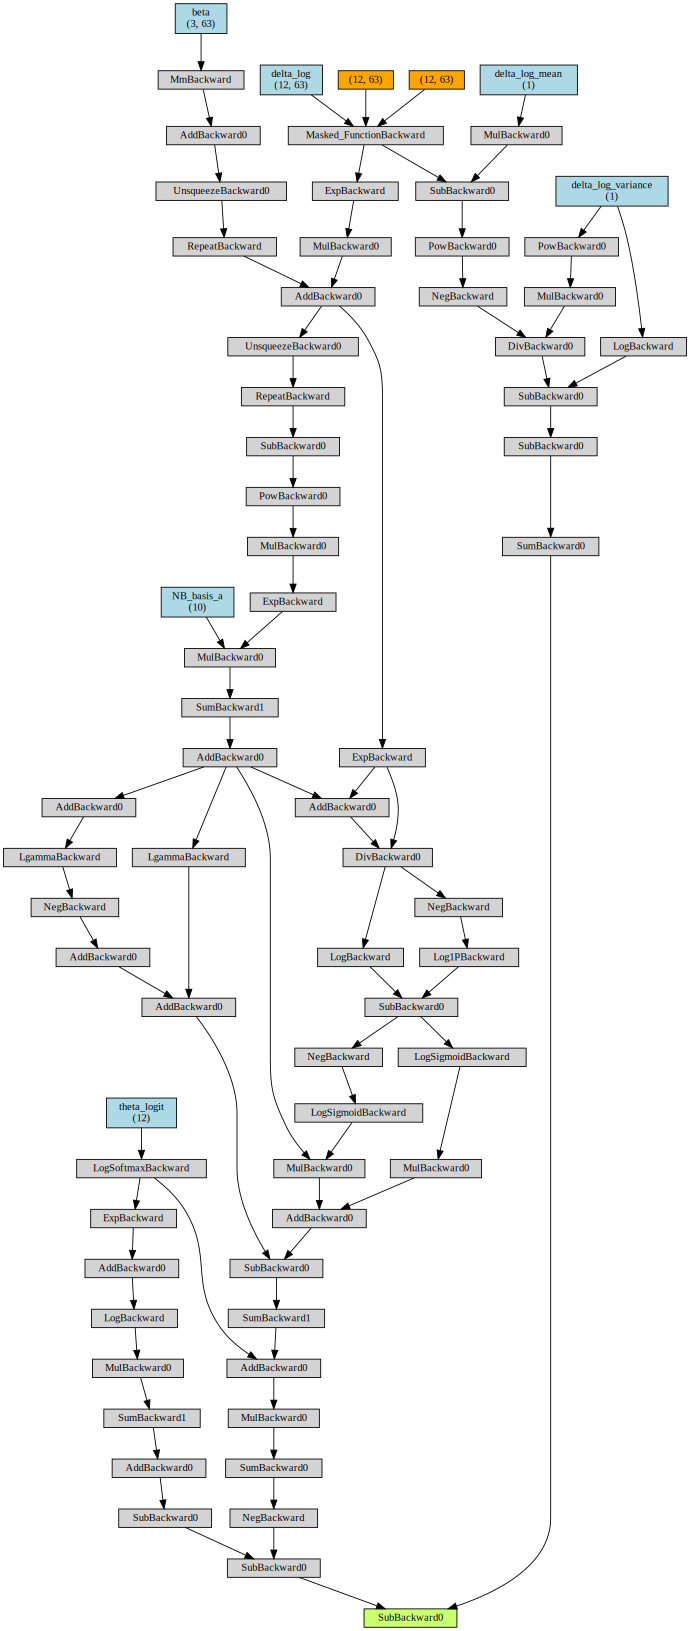

In [439]:
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
    _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')
    
print(LL_old)
print(Q_old)


from torchviz import make_dot, make_dot_from_trace

make_dot(model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')[1],params=dict(model.named_parameters()))
#for i in model.named_parameters():
#    print(i)
    #print(i[1].grad_fn)